In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
df = pd.read_csv('amazon_bestsellers.csv')


In [3]:
# Limpieza de datos (si es necesario)
df['date_scraped'] = pd.to_datetime(df['date_scraped'])


In [4]:
df.head(5)

,rank,title,author,price,score,type_cover,numbers_reviews,date_scraped
0,1,The Book of Bill (Gravity Falls),Alex Hirsch,18.03,4.7,Hardcover,235,2024-08-04
1,2,Hillbilly Elegy: A Memoir of a Family and Cult...,J. D. Vance,11.53,4.4,Paperback,101009,2024-08-04
2,3,It Ends with Us: A Novel (1),Colleen Hoover,10.98,4.7,Paperback,334525,2024-08-04
3,4,Onyx Storm (Deluxe Limited Edition) (The Empyr...,Rebecca Yarros,0.00,0.0,Hardcover,0,2024-08-04
4,5,It Starts with Us: A Novel (2) (It Ends with Us),Colleen Hoover,10.98,4.5,Paperback,170475,2024-08-04


In [5]:
# Análisis exploratorio de datos
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rank             30 non-null     int64         
 1   title            30 non-null     object        
 2   author           30 non-null     object        
 3   price            30 non-null     float64       
 4   score            30 non-null     float64       
 5   type_cover       30 non-null     object        
 6   numbers_reviews  30 non-null     int64         
 7   date_scraped     30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.0+ KB
None
            rank      price      score  numbers_reviews         date_scraped
count  30.000000  30.000000  30.000000        30.000000                   30
mean   15.500000  11.221333   4.176667     89705.800000  2024-08-04 00:00:00
min     1.000000   0.000000   0.000000         0.00

In [6]:
# Top 10 autores más frecuentes
top_authors = df['author'].value_counts().head(10)
print("Top 10 autores más frecuentes:")
print(top_authors)

Top 10 autores más frecuentes:
author
Freida McFadden      5
Colleen Hoover       2
Kristin Hannah       2
Coco Wyo             2
Sarah J. Maas        2
Alex Hirsch          1
Brian Tyler Cohen    1
Don Miguel Ruiz      1
Megan Basham         1
Chris Whitaker       1
Name: count, dtype: int64


In [7]:
# Precio promedio por tipo de cubierta
cover_avg_price = df.groupby('type_cover')['price'].mean().sort_values(ascending=False)
print("\nPrecio promedio por tipo de cubierta:")
print(cover_avg_price)


Precio promedio por tipo de cubierta:
type_cover
Hardcover     12.833333
Paperback     10.847000
Board book     4.200000
Name: price, dtype: float64


In [8]:
# Relación entre puntuación y número de reseñas
df_with_reviews = df[df['numbers_reviews'] > 0]
correlation = df_with_reviews['score'].corr(df_with_reviews['numbers_reviews'])
print(f"\nCorrelación entre puntuación y número de reseñas: {correlation:.2f}")



Correlación entre puntuación y número de reseñas: -0.22


In [9]:
# Configuración de estilos para matplotlib y seaborn
plt.style.use('ggplot')  # Usa el estilo 'ggplot' que es similar al de seaborn
sns.set_theme(style="whitegrid")  # Configuración de tema para seaborn
sns.set_palette("deep")

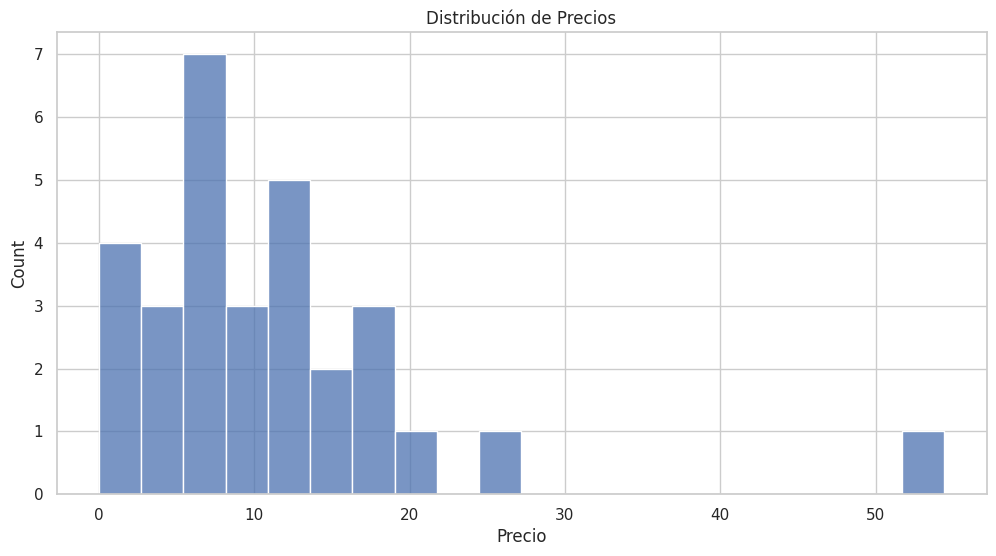

In [12]:
# Visualizaciones
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=20)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
#plt.savefig('price_distribution.png')
plt.show()
plt.close()

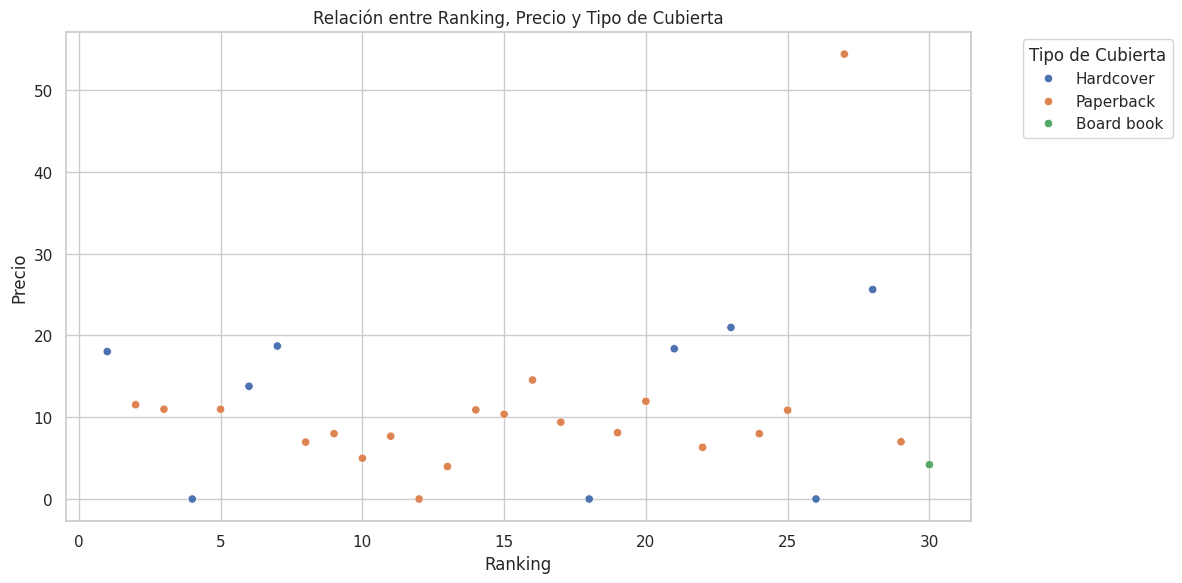

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rank', y='price', hue='type_cover', data=df)
plt.title('Relación entre Ranking, Precio y Tipo de Cubierta')
plt.xlabel('Ranking')
plt.ylabel('Precio')
plt.legend(title='Tipo de Cubierta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('rank_price_cover.png')
plt.show()
plt.close()

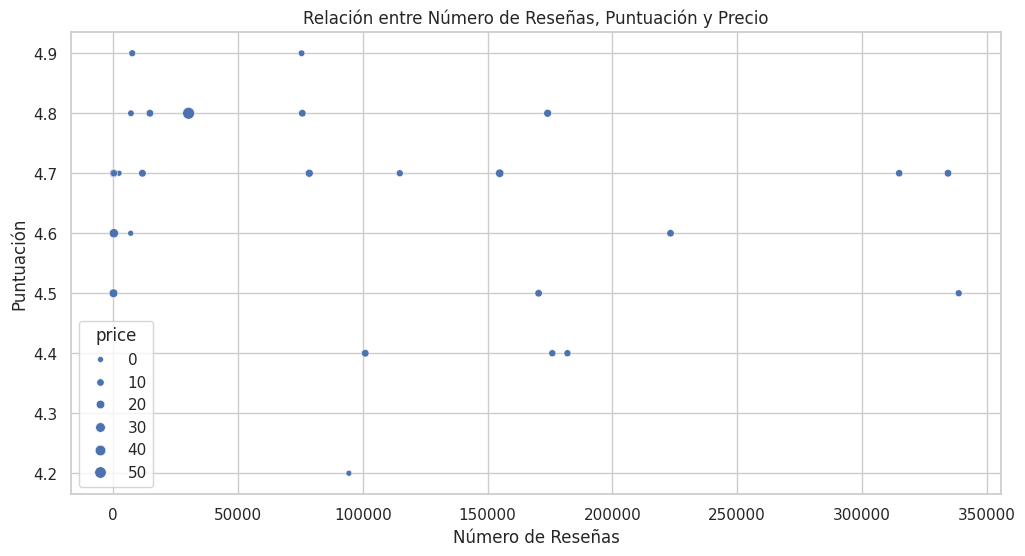

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numbers_reviews', y='score', size='price', data=df_with_reviews)
plt.title('Relación entre Número de Reseñas, Puntuación y Precio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Puntuación')
#plt.savefig('reviews_score_price.png')
plt.show()
plt.close()

In [16]:
# Análisis de los libros mejor puntuados
top_rated = df[df['score'] > 4.5].sort_values('numbers_reviews', ascending=False).head(10)
print("\nTop 10 libros mejor puntuados (con más de 4.5 estrellas):")
top_rated[['title', 'author', 'score', 'numbers_reviews', 'price']]



Top 10 libros mejor puntuados (con más de 4.5 estrellas):


,title,author,score,numbers_reviews,price
2,It Ends with Us: A Novel (1),Colleen Hoover,4.7,334525,10.98
16,The Nightingale: A Novel,Kristin Hannah,4.7,314957,9.40
14,A Court of Thorns and Roses (A Court of Thorns...,Sarah J. Maas,4.6,223330,10.37
5,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,174094,13.79
6,The Women: A Novel,Kristin Hannah,4.7,154892,18.71
28,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,114855,7.00
15,The 48 Laws of Power,Robert Greene,4.7,78592,14.55
24,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,4.8,75794,10.86
29,I Love You to the Moon and Back,Amelia Hepworth,4.9,75506,4.20
26,A Court of Thorns and Roses Paperback Box Set ...,Sarah J. Maas,4.8,30228,54.41


In [ ]:
# Guardar resultados procesados
df.to_csv('processed_amazon_bestsellers.csv', index=False)
print("\nDatos procesados guardados en 'processed_amazon_bestsellers.csv'")
print("Visualizaciones guardadas como 'price_distribution.png', 'rank_price_cover.png', y 'reviews_score_price.png'")


Datos procesados guardados en 'processed_amazon_bestsellers.csv'
Visualizaciones guardadas como 'price_distribution.png', 'rank_price_cover.png', y 'reviews_score_price.png'


In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Funciones auxiliares
def create_title(title):
    return HTML(f"<h1>{title}</h1>")

def create_subtitle(subtitle):
    return HTML(f"<h2>{subtitle}</h2>")

def create_paragraph(text):
    return HTML(f"<p>{text}</p>")

# Título del reporte
display(create_title("Reporte de Best Sellers de Amazon"))


Text(0, 0.5, 'Frecuencia')

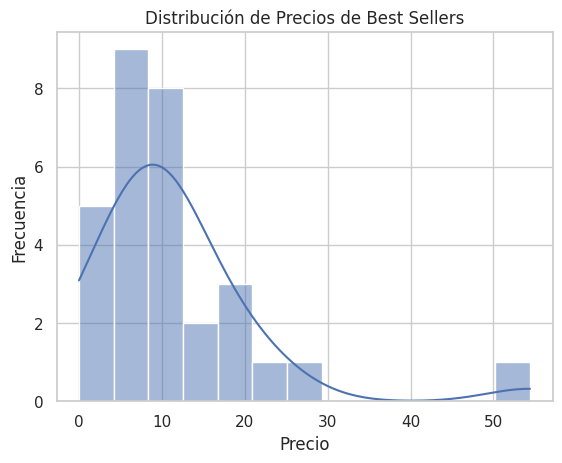

In [29]:
# Distribución de precios
display(create_subtitle("Distribución de Precios"))

sns.histplot(data=df, x='price', kde=True)
plt.title('Distribución de Precios de Best Sellers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

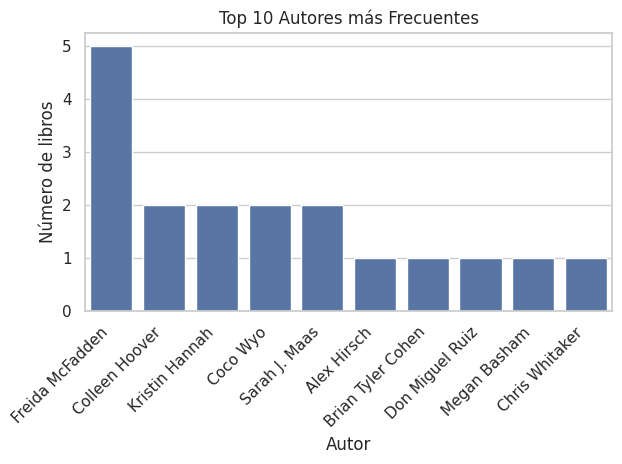

In [30]:
# Top 10 autores
display(create_subtitle("Top 10 Autores"))

top_authors = df['author'].value_counts().head(10)
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 10 Autores más Frecuentes')
plt.xlabel('Autor')
plt.ylabel('Número de libros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Text(0, 0.5, 'Puntuación')

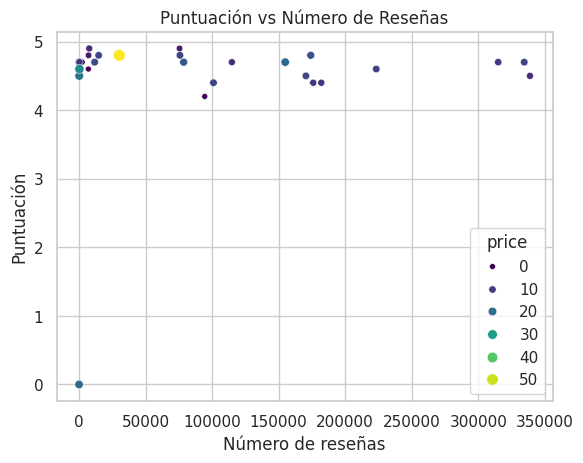

In [31]:
# Relación entre puntuación y número de reseñas
display(create_subtitle("Relación entre Puntuación y Número de Reseñas"))

sns.scatterplot(data=df, x='numbers_reviews', y='score', size='price', hue='price', palette='viridis')
plt.title('Puntuación vs Número de Reseñas')
plt.xlabel('Número de reseñas')
plt.ylabel('Puntuación')

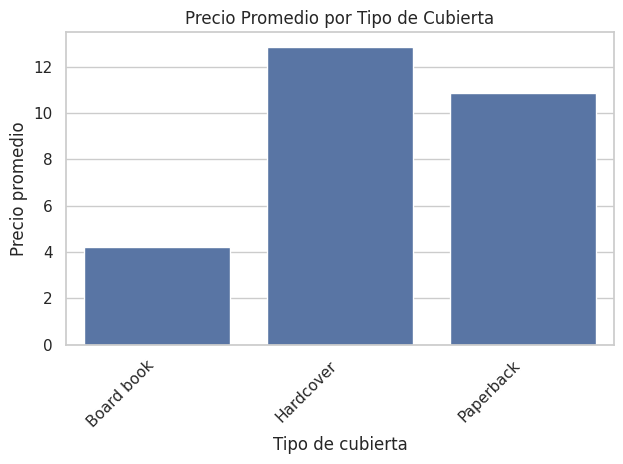

In [32]:
# Precio promedio por tipo de cubierta
display(create_subtitle("Precio Promedio por Tipo de Cubierta"))

avg_price_cover = df.groupby('type_cover')['price'].mean().reset_index()
sns.barplot(data=avg_price_cover, x='type_cover', y='price')
plt.title('Precio Promedio por Tipo de Cubierta')
plt.xlabel('Tipo de cubierta')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [37]:
import numpy as np
# Tabla de los 10 libros mejor puntuados
display(create_subtitle("Top 10 Libros Mejor Puntuados"))

top_rated = df[df['score'] > 4.5].sort_values('numbers_reviews', ascending=False).head(10)

# Función para aplicar estilo a la tabla
def highlight_max(s, props=''):
    return np.where(s == np.max(s.values), props, '')

# Estilizar la tabla
styled_table = (top_rated[['title', 'author', 'score', 'numbers_reviews', 'price']]
    .style
    .background_gradient(cmap='YlOrRd', subset=['score', 'numbers_reviews'])
    .format({'score': '{:.2f}', 'price': '${:.2f}', 'numbers_reviews': '{:,}'})
    .set_properties(**{'text-align': 'left', 'font-size': '11px'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'),
                                     ('font-weight', 'bold'), ('text-align', 'left'),
                                     ('padding', '10px')]},
        {'selector': 'td', 'props': [('padding', '10px')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom'), ('font-size', '14px')]}
    ])
    .set_caption("Top 10 Libros Mejor Puntuados")
    .apply(highlight_max, props='font-weight:bold;', axis=0, subset=['score', 'numbers_reviews'])
)
display(HTML(styled_table.to_html()))

,title,author,score,numbers_reviews,price
2,It Ends with Us: A Novel (1),Colleen Hoover,4.70,"334,525",$10.98
16,The Nightingale: A Novel,Kristin Hannah,4.70,"314,957",$9.40
14,"A Court of Thorns and Roses (A Court of Thorns and Roses, 1)",Sarah J. Maas,4.60,"223,330",$10.37
5,Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones,James Clear,4.80,"174,094",$13.79
6,The Women: A Novel,Kristin Hannah,4.70,"154,892",$18.71
28,The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,4.70,"114,855",$7.00
15,The 48 Laws of Power,Robert Greene,4.70,"78,592",$14.55
24,"The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma",Bessel van der Kolk M.D.,4.80,"75,794",$10.86
29,I Love You to the Moon and Back,Amelia Hepworth,4.90,"75,506",$4.20
26,"A Court of Thorns and Roses Paperback Box Set (5 books) (A Court of Thorns and Roses, 9)",Sarah J. Maas,4.80,"30,228",$54.41
